### 1. Problem Statement:

Understand how the students performance in tests are affected by different variables like gender, race_ethnicity, parental level of education, lunch, test preparation course.

### 2. Data Collection:

Data Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

The dataset contains information on students marks with details like gender, race ethnicity, parental education..etc. 
The data consists of 8 columns and 1000 rows.

Import required packages and Dataset.

import pandas, numpy, matplotlib, seaborn, warnings libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# "Matplotlib inline" allows you to interact with your plots directly in the notebook, 
# such as zooming, panning, and saving.
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('stud.csv')

In [4]:
# show top 5 records
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# shape of the dataset
df.shape

(1000, 8)

### 3. Data Checks to Perform

- Check missing values
- Check for duplicates
- Check data types
- Check number of unique values of each column
- Check statistics of the data
- Check various categories present in different categorical columns

3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

3.2 Check for duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

3.3 Check data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Check number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of the data

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:
- The mean score of all three subjects is almost same, i.e. between 66 - 68
- The standard deviations are also close to each other, between 14.6 - 15.19
- Minimum score for maths is 0, writing is 10, reading is 17 

3.6 Check various categories present in different categorical columns

In [11]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print('Categories in gender: ', df['gender'].unique())
print('Categories in race_ethnicity: ', df['race_ethnicity'].unique())
print('Categories in parental_level_of_education: ', df['parental_level_of_education'].unique())
print('Categories in lunch: ', df['lunch'].unique())
print('Categories in test_preparation_course: ', df['test_preparation_course'].unique())

Categories in gender:  ['female' 'male']
Categories in race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:  ['standard' 'free/reduced']
Categories in test_preparation_course:  ['none' 'completed']


In [13]:
# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'we have {len(numerical_features)} numerical features: {numerical_features}')
print(f'we have {len(categorical_features)} categorical features: {categorical_features}')

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.7 Adding columns for 'Total Score' and 'Avg. Score'

In [14]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [15]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
# number of students with full marks
math_full = df[df['math_score']== 100]['average'].count()
reading_full = df[df['reading_score']== 100]['average'].count()
writing_full = df[df['writing_score']== 100]['average'].count()

print('No of students with full marks in maths: ', math_full)
print('No of students with full marks in reading: ', reading_full)
print('No of students with full marks in writing: ', writing_full)

No of students with full marks in maths:  7
No of students with full marks in reading:  17
No of students with full marks in writing:  14


In [17]:
# number of students with less than 21 marks
math_full = df[df['math_score'] <= 20]['average'].count()
reading_full = df[df['reading_score'] <= 20]['average'].count()
writing_full = df[df['writing_score'] <= 20]['average'].count()

print('No of students with less than 21 marks in maths: ', math_full)
print('No of students with less than 21 marks in reading: ', reading_full)
print('No of students with less than 21 marks in writing: ', writing_full)

No of students with less than 21 marks in maths:  4
No of students with less than 21 marks in reading:  1
No of students with less than 21 marks in writing:  3


Observations:
- From above marks, we can observe that students performed poorly in Maths exam
- Students performed well in reading and writing exams

### 4. Exploring Data (Visualizations)

4.1 Visualize average score distribution

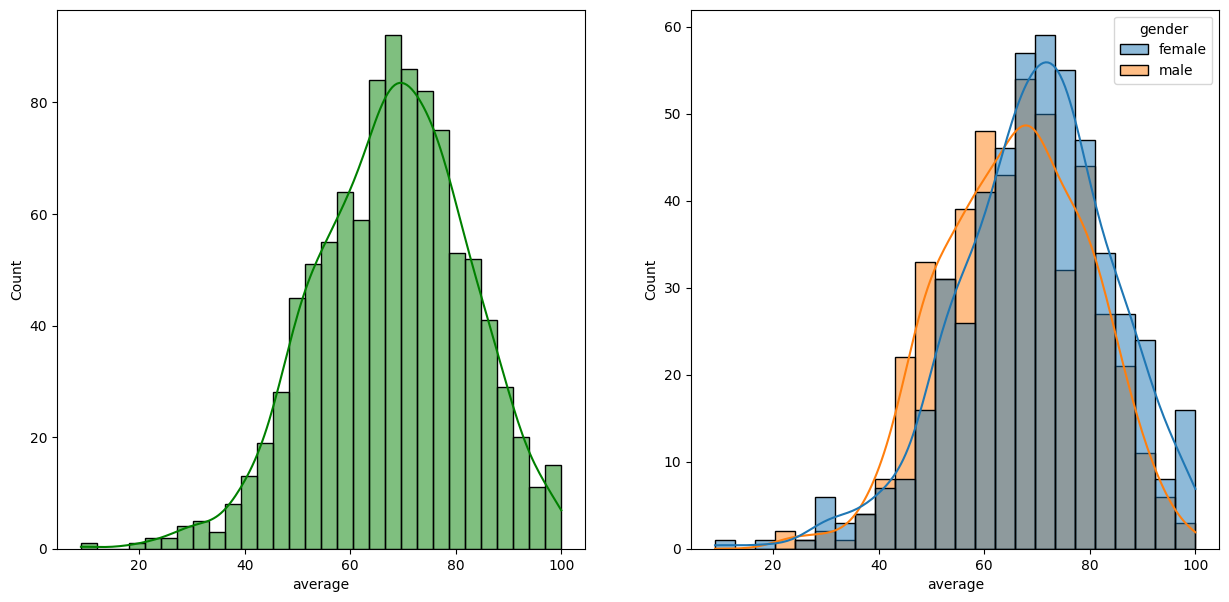

In [18]:
# histogram for average score
fig, axs = plt.subplots(1, 2, figsize = (15, 7))

# plot 1
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'g')

#plot 2
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

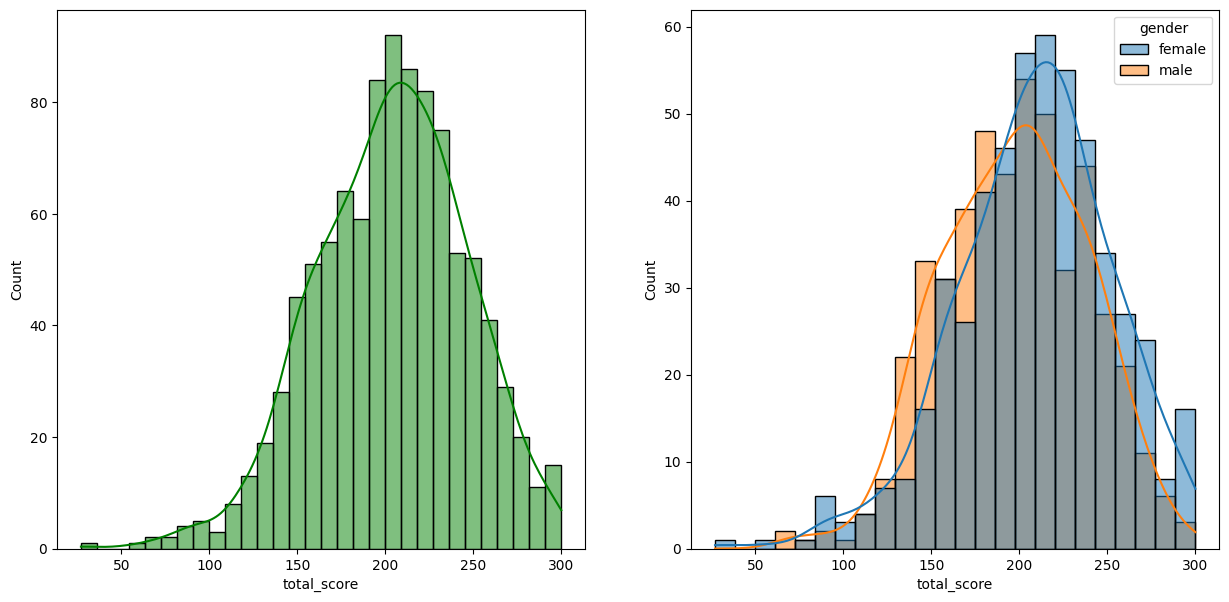

In [19]:
# histogram for total score
fig, axs = plt.subplots(1, 2, figsize = (15, 7))

# plot 1
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True, color='g')

# plot 2
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', kde = True, hue = 'gender')

# show the plots
plt.show()

Observations:
- Female students tend to perform well than male students

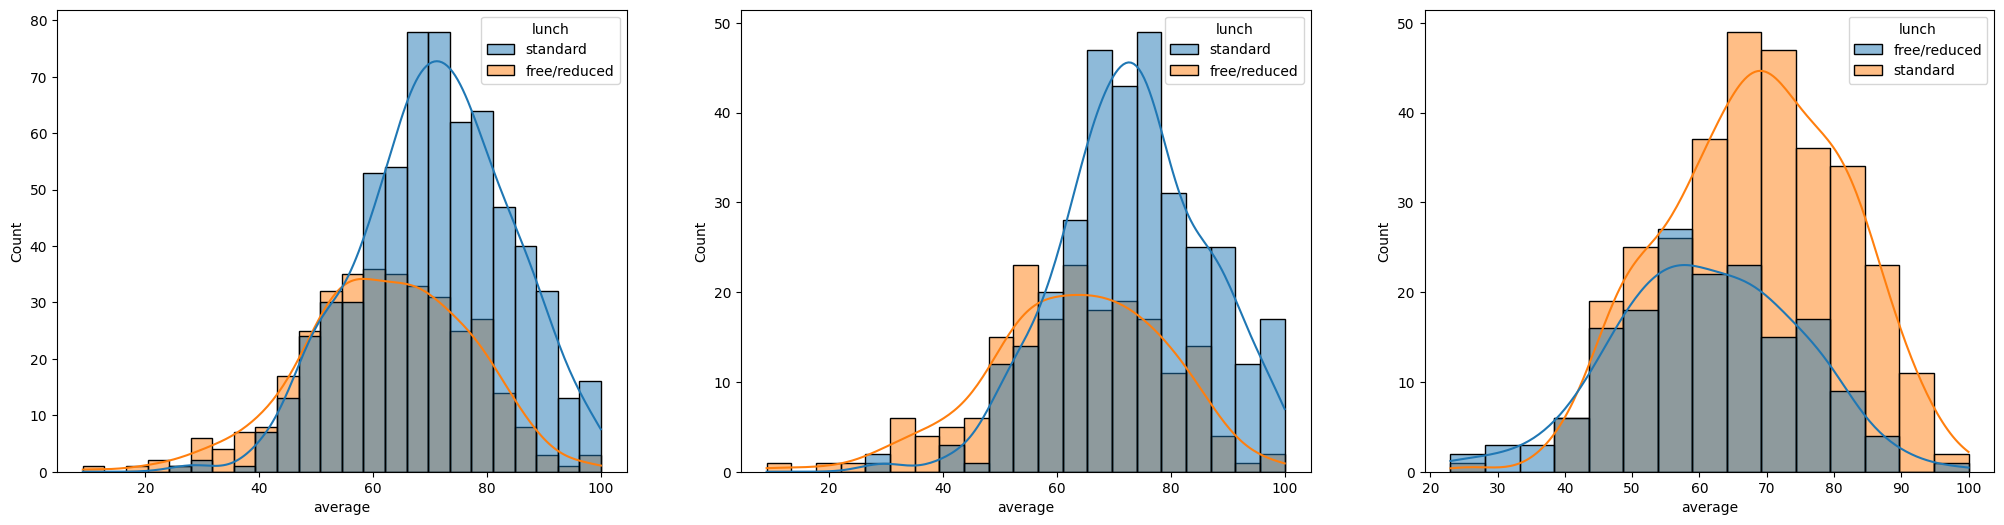

In [20]:
# histogram (lunch & gender)
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# plot 1
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')

# plot 2
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde=True, hue = 'lunch')

# plot 3
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue ='lunch')

#show the plots
plt.show()

Observations:
- Students who had standard lunch performed well in the exams
- Students who had standard lunch performed well whether it is male or female

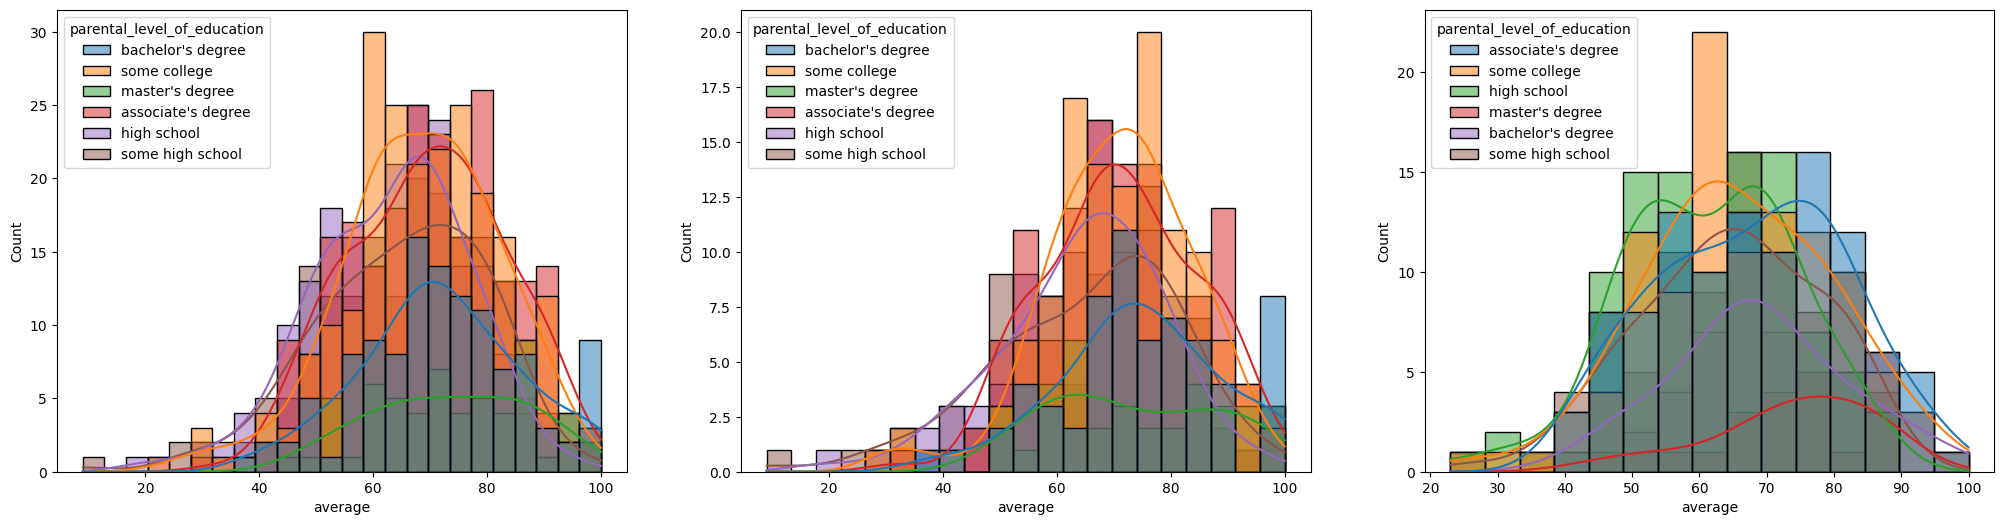

In [21]:
# histogram (Parental level of education)

fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# plot 1
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental_level_of_education')

# plot 2
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'parental_level_of_education')

# plot 3
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental_level_of_education')

# show the plots
plt.show()

Observations:
- In general, parents education is not effecting the students performance in exams
- If we consider based on gender:
  - For parents whose education is associate's degree or master's degree, their male child is performing well.
  - Parents education has no effect for female students.

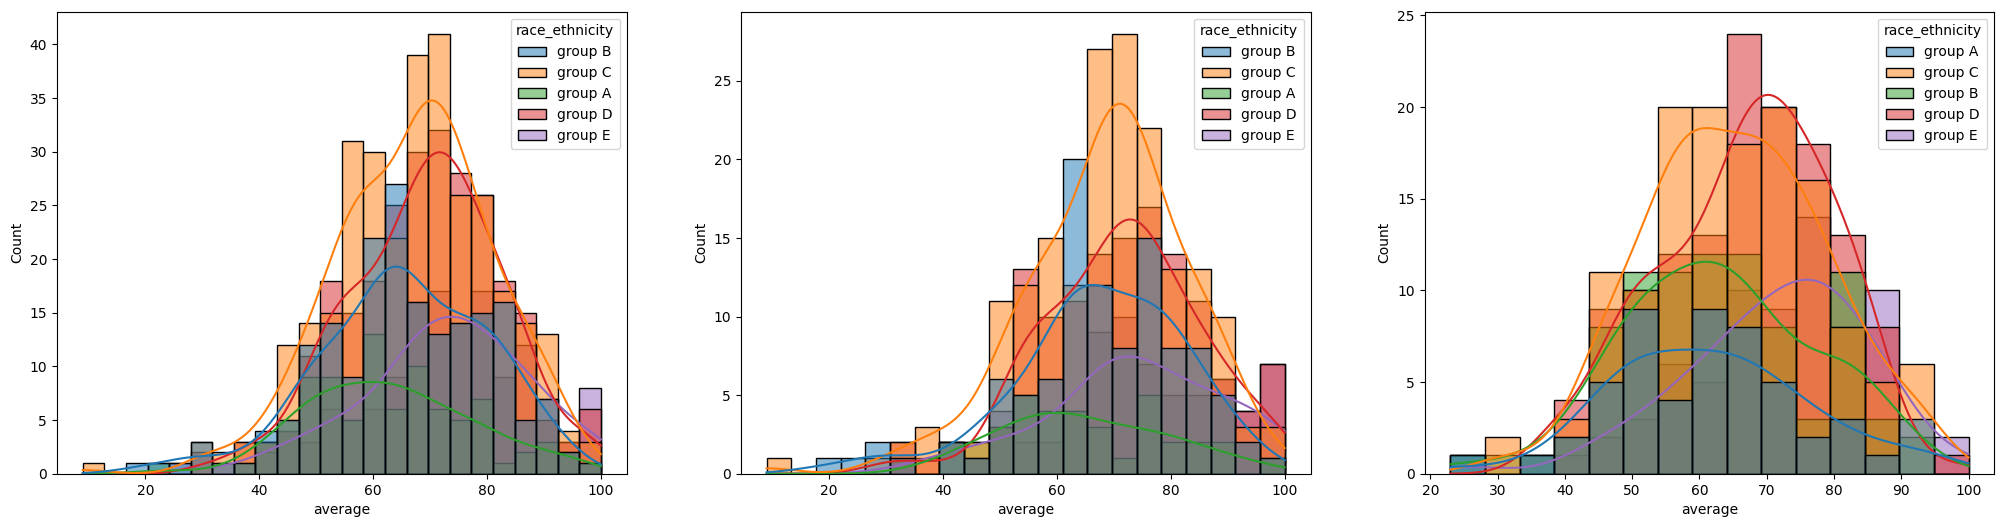

In [22]:
# histogram (race/ethinicity)
fig, axs = plt.subplots(1, 3, figsize = (25, 6))

# plot 1
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race_ethnicity')

# plot 2 (female data)
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'race_ethnicity')

# plot 3 (male data)
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde = True, hue = 'race_ethnicity')

# show the plots
plt.show()

Observations:
- Students of group A and group B tend to perform poorly in the exams
- This can be seen in both male and female students.

4.2 Score range of students in all three subjects

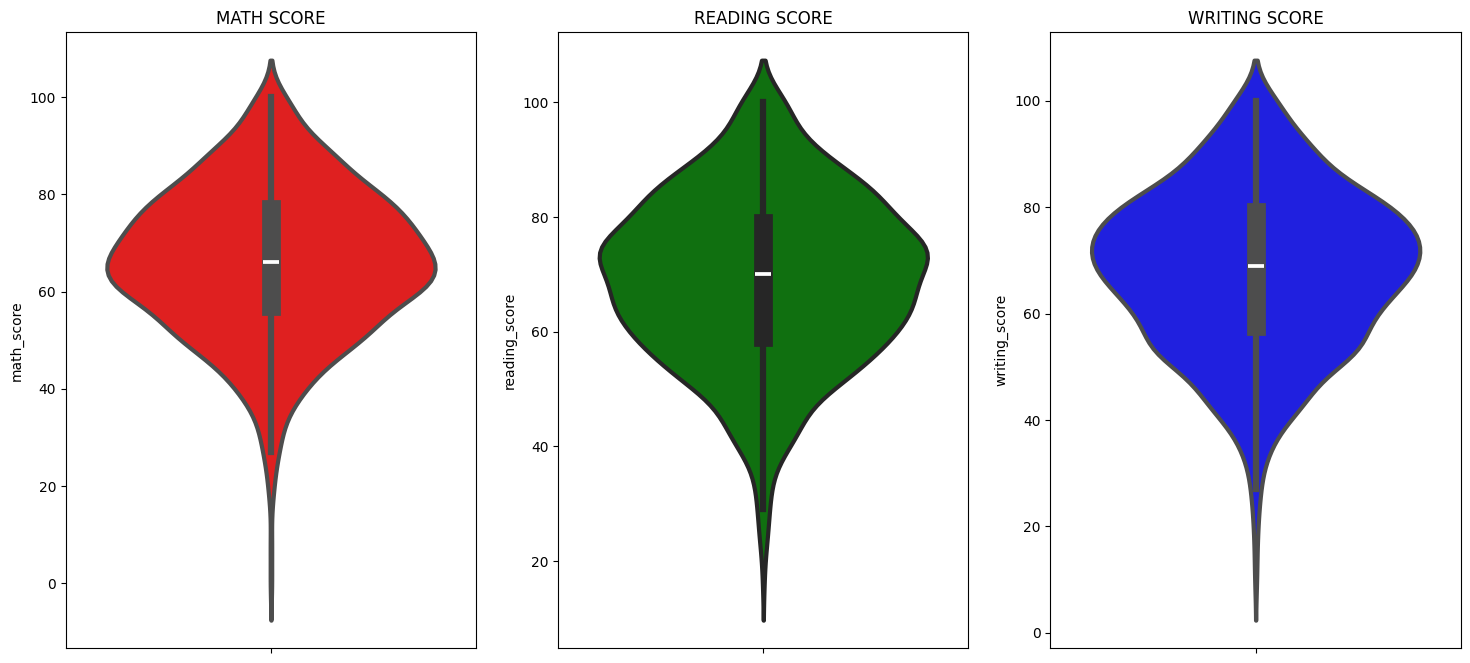

In [23]:
# violin plots
plt.subplots(1, 3, figsize = (18, 8))

# plot 1: math score
plt.subplot(131)
plt.title('MATH SCORE')
sns.violinplot(data=df, y='math_score', color = 'r', linewidth=3)

# plot 2: reading score
plt.subplot(132)
plt.title('READING SCORE')
sns.violinplot(data=df, y='reading_score', color = 'g', linewidth = 3)

# plot 3: writing score
plt.subplot(133)
plt.title('WRITING SCORE')
sns.violinplot(data=df, y='writing_score', color = 'b', linewidth = 3)

# show the plots
plt.show()

Observations:
- Most of the students score between 55 - 80 marks in all subjects

4.3 Multivariate analysis using pie charts

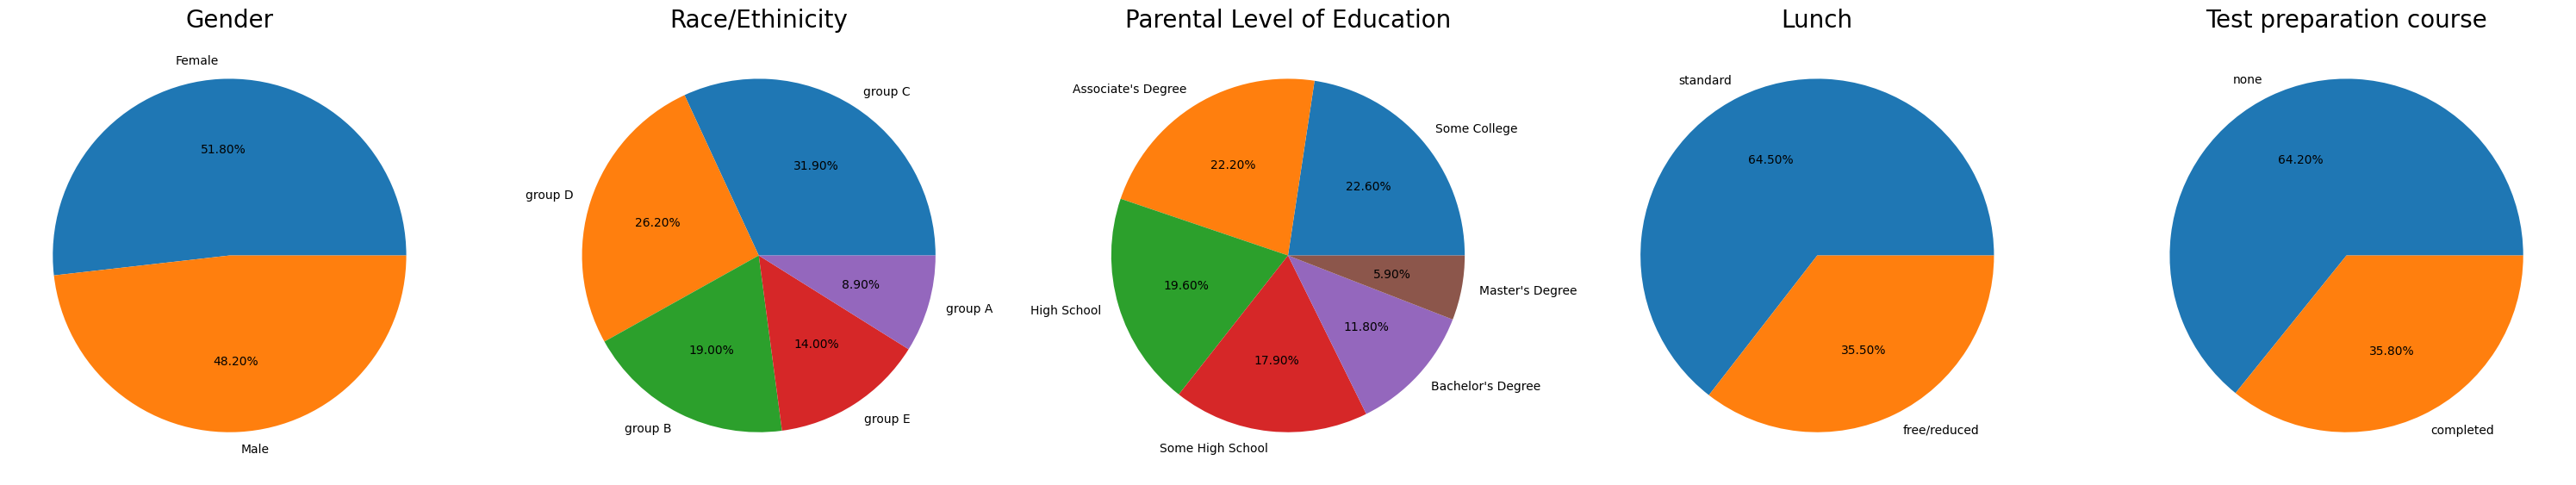

In [24]:
plt.rcParams['figure.figsize'] = (30, 12) # rcParams -> over rides the default plot size

# gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
plt.pie(size, labels = labels, autopct = '%0.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

# race_ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['group C', 'group D', 'group B', 'group E', 'group A']
plt.pie(size, labels=labels, autopct='%0.2f%%')
plt.title('Race/Ethinicity', fontsize = 20)

# parental_level_of_education
plt.subplot(1, 5, 3)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree",'High School',
          'Some High School',"Bachelor's Degree","Master's Degree"]
plt.pie(size, labels=labels, autopct='%0.2f%%')
plt.title('Parental Level of Education', fontsize=20)

# lunch
plt.subplot(1,5, 4)
size = df['lunch'].value_counts()
labels = ['standard', 'free/reduced']
plt.pie(size, labels=labels, autopct='%0.2f%%')
plt.title('Lunch', fontsize=20)

# test_preparation_course
plt.subplot(1, 5, 5)
size = df['test_preparation_course'].value_counts()
labels = ['none', 'completed']
plt.pie(size, labels=labels, autopct = '%0.2f%%')
plt.title('Test preparation course', fontsize=20)

plt.tight_layout()
plt.grid()

# show the plots
plt.show()

Observations:
- Gender ratio is almost same.
- No. of students are highest in group C
- No.of students whose parental level of education is 'Some college' is greatest, followed by 'Associate's degree'
- No. of students who had standard lunch is greatest
- No. of students who had not enrolled in test preparation course is greatest

4.4 Feature wise Visualizations

4.4.1 Gender column

Univariate Analysis (How is distribution of Gender ?)

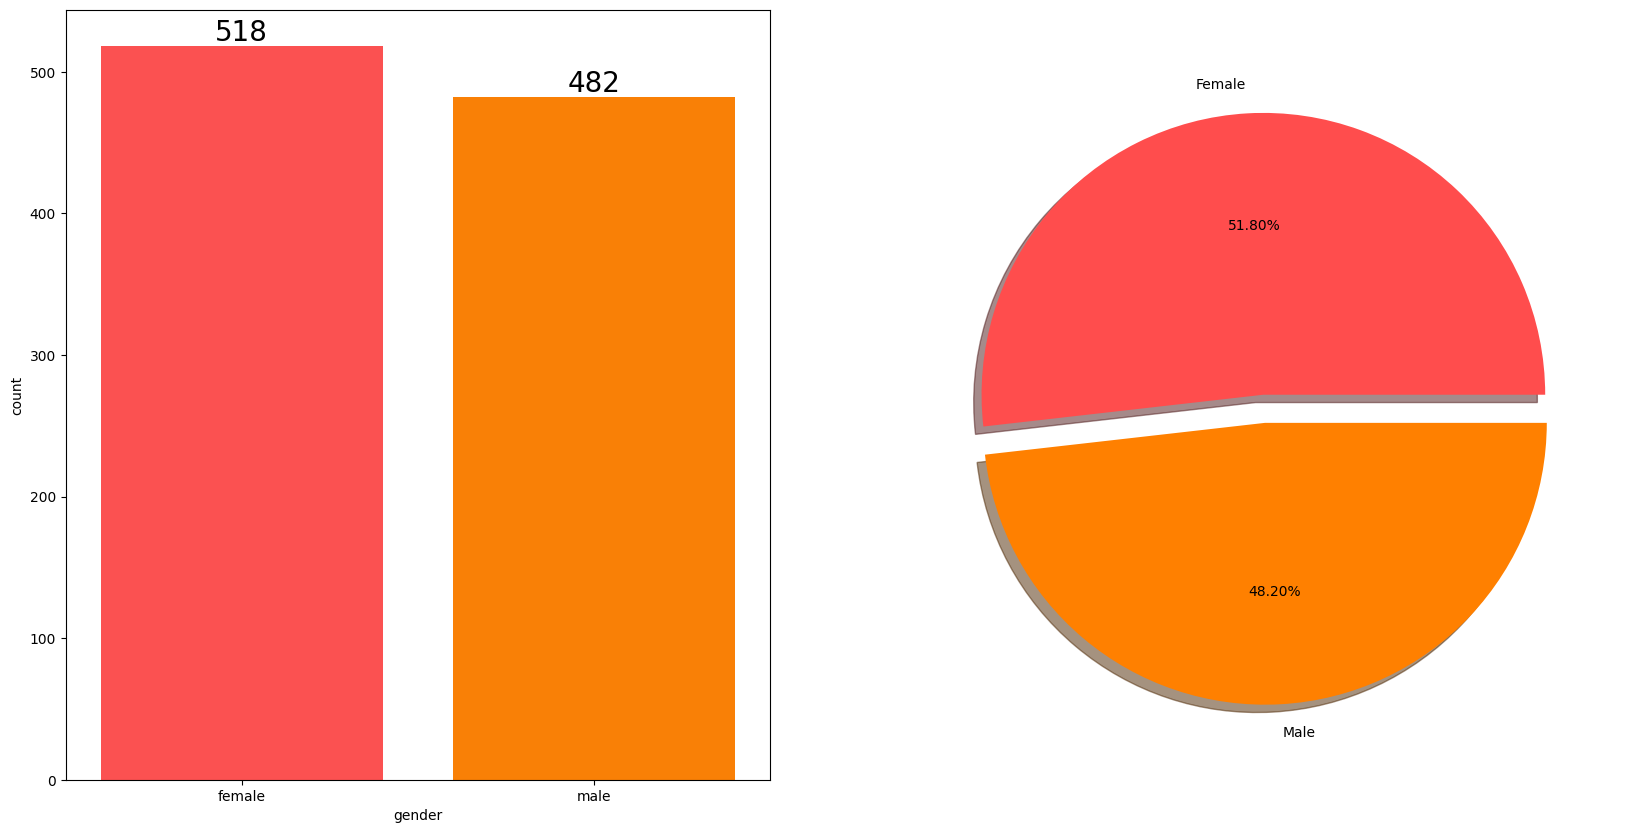

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))

# count plot
sns.countplot(data=df, x=df['gender'], palette =['#ff4d4d','#ff8000'], ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

# pie plot
ax[1]
size = df['gender'].value_counts()
labels = ['Female','Male']
colors = ['#ff4d4d','#ff8000']
plt.pie(size, labels= labels, colors=colors, autopct='%0.2f%%', explode=[0,0.1], shadow=True)
# The explode parameter, if specified, and not None, must be an array with one value for each wedge.
# Each value represents how far from the center each wedge is displayed

# show the plots
plt.show()

Observations:
- Female students count - 518 (51.8%)
- Male students count - 482 (48.2%)
- We can say the gender is balanced between male and female students.

Bivariate Analysis (Does gender has an impact on students performance?)

In [26]:
gender_grouped = df.groupby('gender').mean(numeric_only=True)
gender_grouped.head()

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


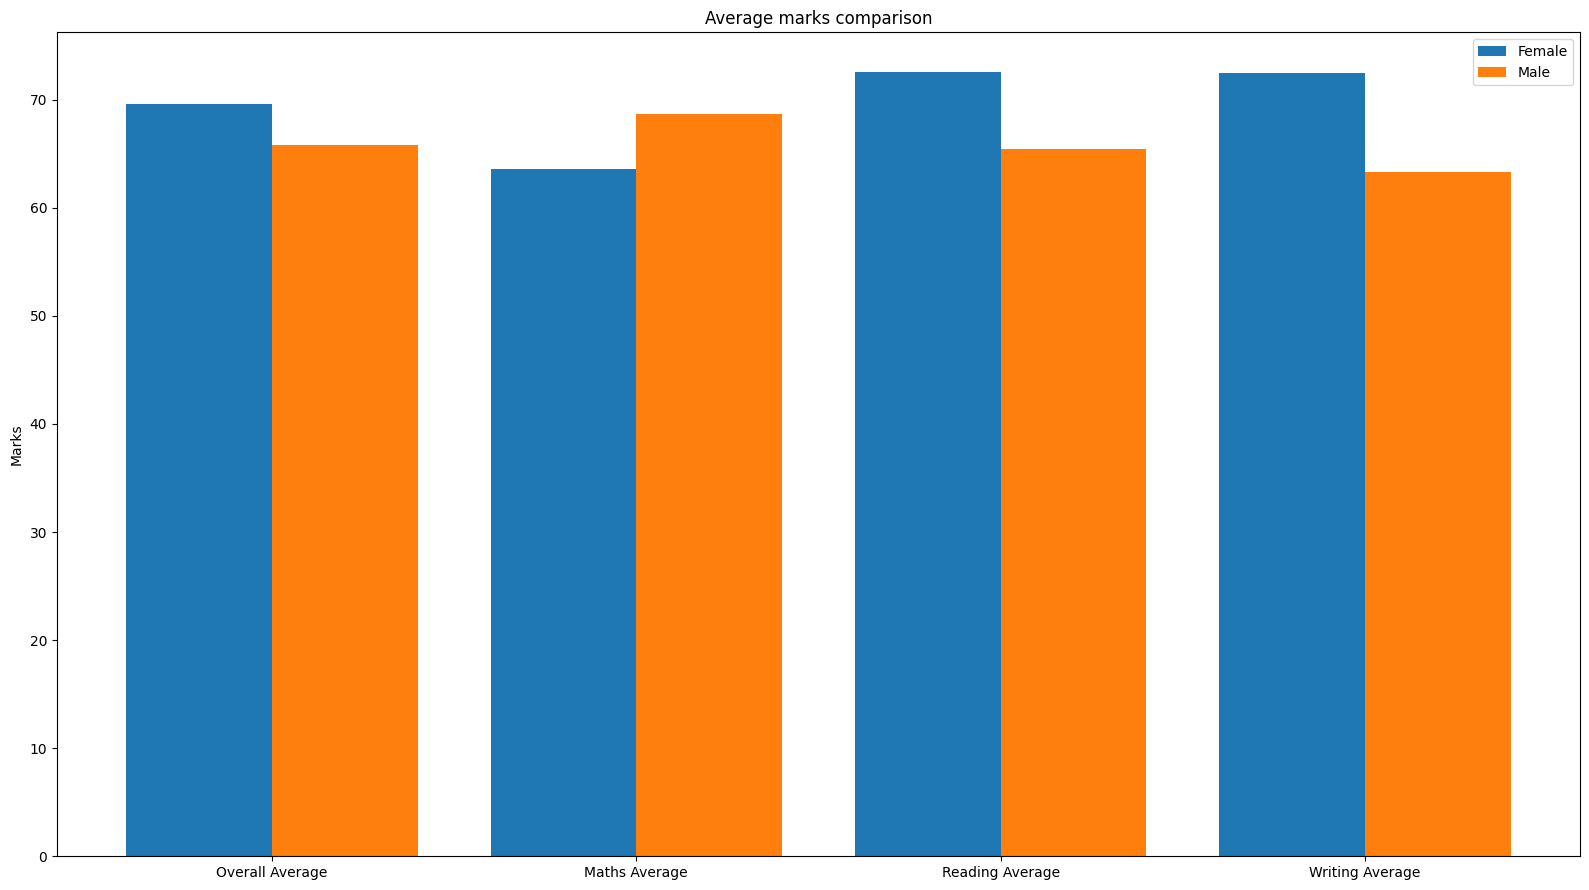

In [27]:
plt.figure(figsize=(16, 9))

x = ['Overall Average', 'Maths Average', 'Reading Average', 'Writing Average']

female_scores = [gender_grouped['average'][0], gender_grouped['math_score'][0], gender_grouped['reading_score'][0], gender_grouped['writing_score'][0]]
male_scores = [gender_grouped['average'][1], gender_grouped['math_score'][1], gender_grouped['reading_score'][1], gender_grouped['writing_score'][1]]

x_axis = np.arange(len(x))

# plt.bar(x, height, width=0.8, label)
plt.bar(x_axis-0.2, female_scores, width=0.4, label = 'Female')
plt.bar(x_axis+0.2, male_scores, width=0.4, label = 'Male')


plt.xticks(x_axis, x)
plt.ylabel('Marks')
plt.title('Average marks comparison')
plt.legend()
plt.tight_layout()
plt.show()

Observations:
- Female students have a higher overall average score than male students
- Male students have performed well in maths exam than female students
- Female students have performed well in reading and writing exams

4.4.2 Race ethnicity column

Univariate Analysis (How is distribution?)

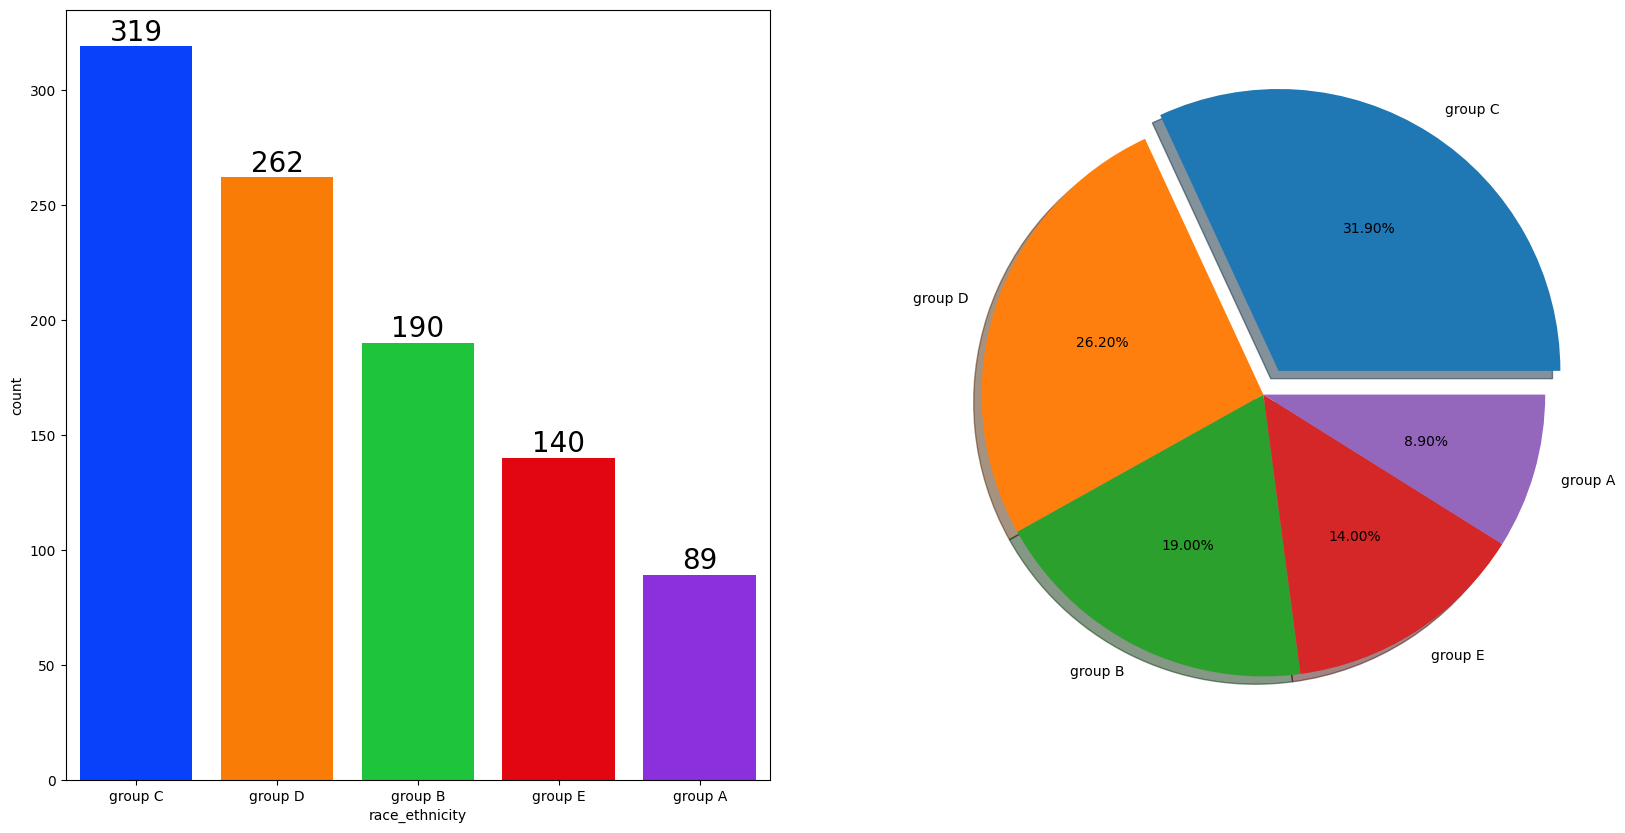

In [28]:
# create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# countplot
sns.countplot(data=df, x=df['race_ethnicity'], palette='bright', ax=ax[0], saturation=0.95, order= df['race_ethnicity'].value_counts().index)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

#pie plot
ax[1]
size = df['race_ethnicity'].value_counts()
labels = df['race_ethnicity'].value_counts().index
plt.pie(x=size, labels=labels, autopct='%0.2f%%', explode=[0.1,0,0,0,0], shadow=True)

plt.show()

Observations:
- Group C has highest number of students, followed by group D
- Group A has least number of students

Bivariate Analysis (Does race/ethnicity has an impact on students performance?)

In [29]:
race_ethnicity_grouped = df.groupby('race_ethnicity').mean(numeric_only=True)
race_ethnicity_grouped

,math_score,reading_score,writing_score,total_score,average
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


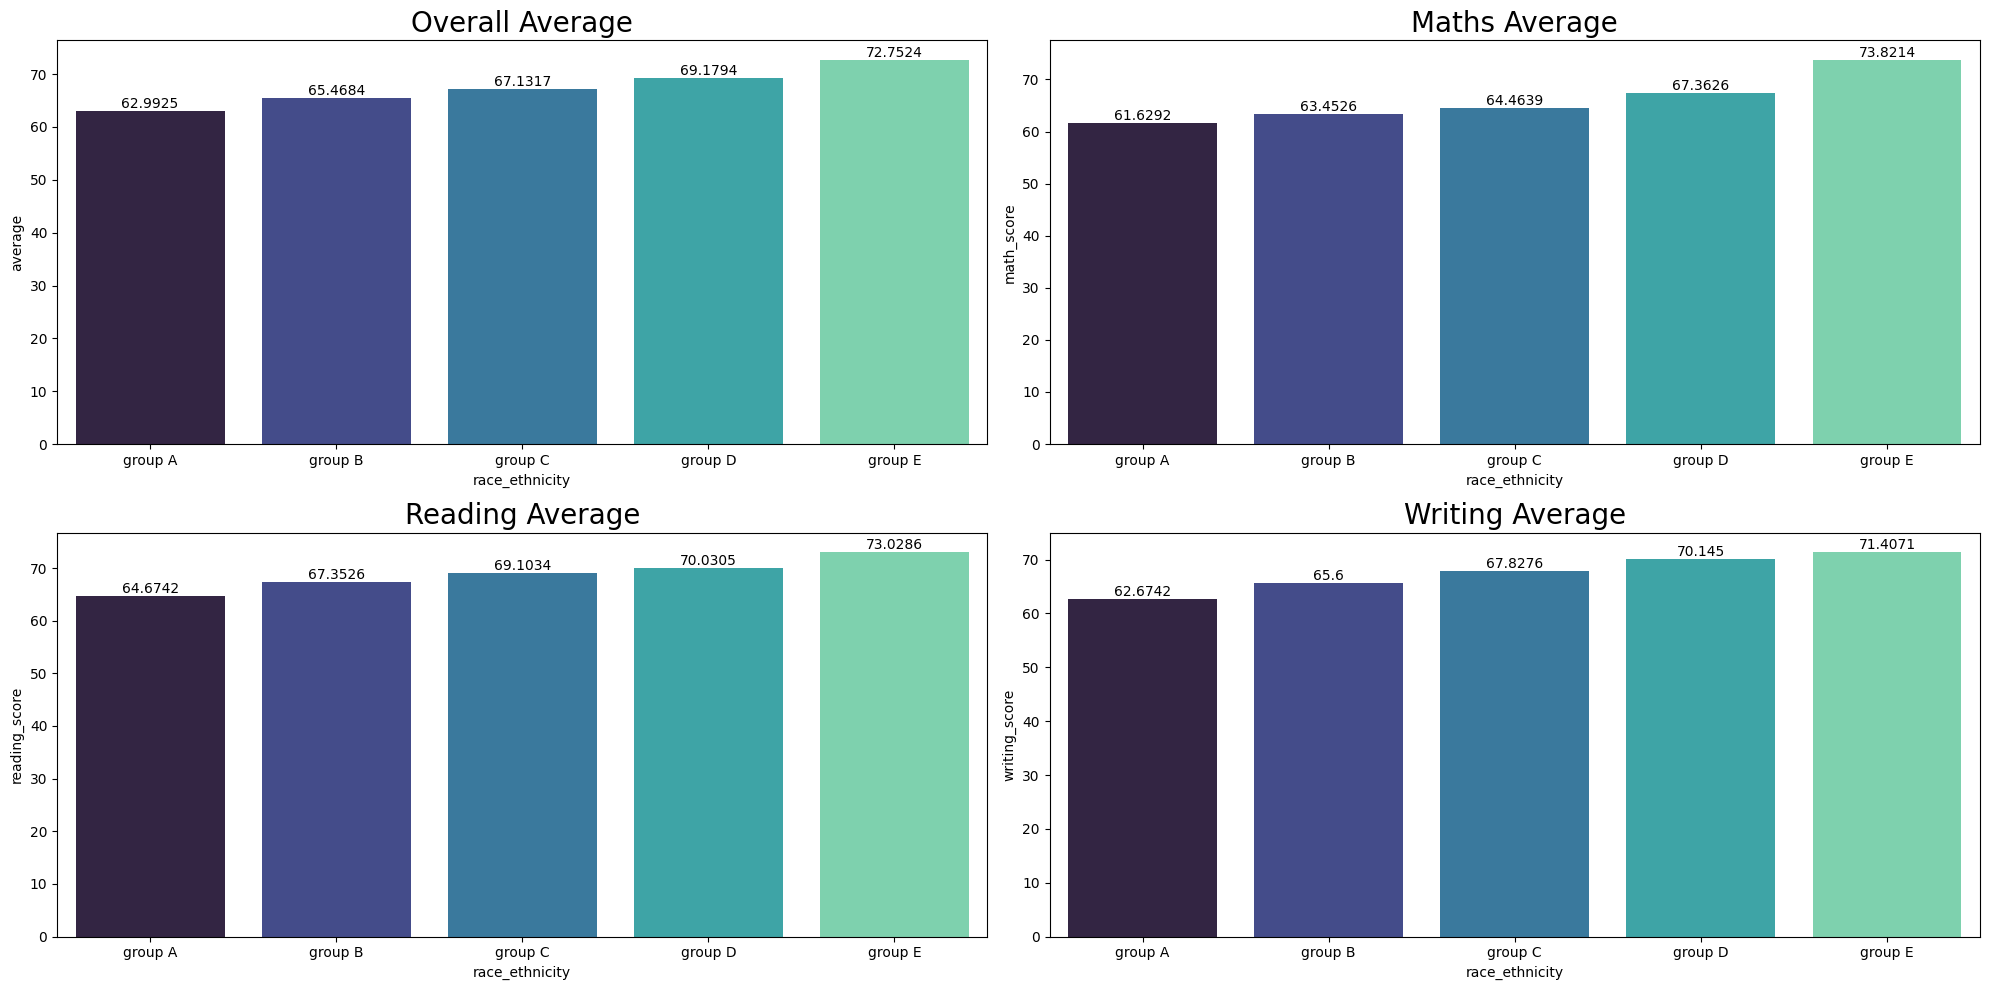

In [30]:
f, ax = plt.subplots(2, 2, figsize=(20, 10))

# overall average
sns.barplot(x=race_ethnicity_grouped.index, y=race_ethnicity_grouped['average'], palette='mako', ax=ax[0][0], saturation=0.90)
ax[0][0].set_title('Overall Average', size=20)
for container in ax[0][0].containers:
    ax[0][0].bar_label(container, color='black', size=10)

# maths average
sns.barplot(x=race_ethnicity_grouped.index, y=race_ethnicity_grouped['math_score'], palette='mako', ax=ax[0][1], saturation=0.90)
ax[0][1].set_title('Maths Average', size=20)
for container in ax[0][1].containers:
    ax[0][1].bar_label(container, color='black', size=10)

# reading average
sns.barplot(x=race_ethnicity_grouped.index, y=race_ethnicity_grouped['reading_score'], palette='mako', ax=ax[1][0], saturation=0.90)
ax[1][0].set_title('Reading Average', size=20)
for container in ax[1][0].containers:
    ax[1][0].bar_label(container, color='black', size=10)

# writing average
sns.barplot(x=race_ethnicity_grouped.index, y=race_ethnicity_grouped['writing_score'], palette='mako', ax=ax[1][1], saturation=0.90)
ax[1][1].set_title('Writing Average', size=20)
for container in ax[1][1].containers:
    ax[1][1].bar_label(container, color='black', size=10)

plt.tight_layout()
# show the plots
plt.show()

Observations:
- Group E students have performed well in all the exams compared to other groups
- Group A students haven't performed well in all the exams compared to other groups
- As we move from group A to group E, the performance is increasing

4.4.3 Parental Level of Education column

Univariate Analysis (How is the distribution of parents education?)

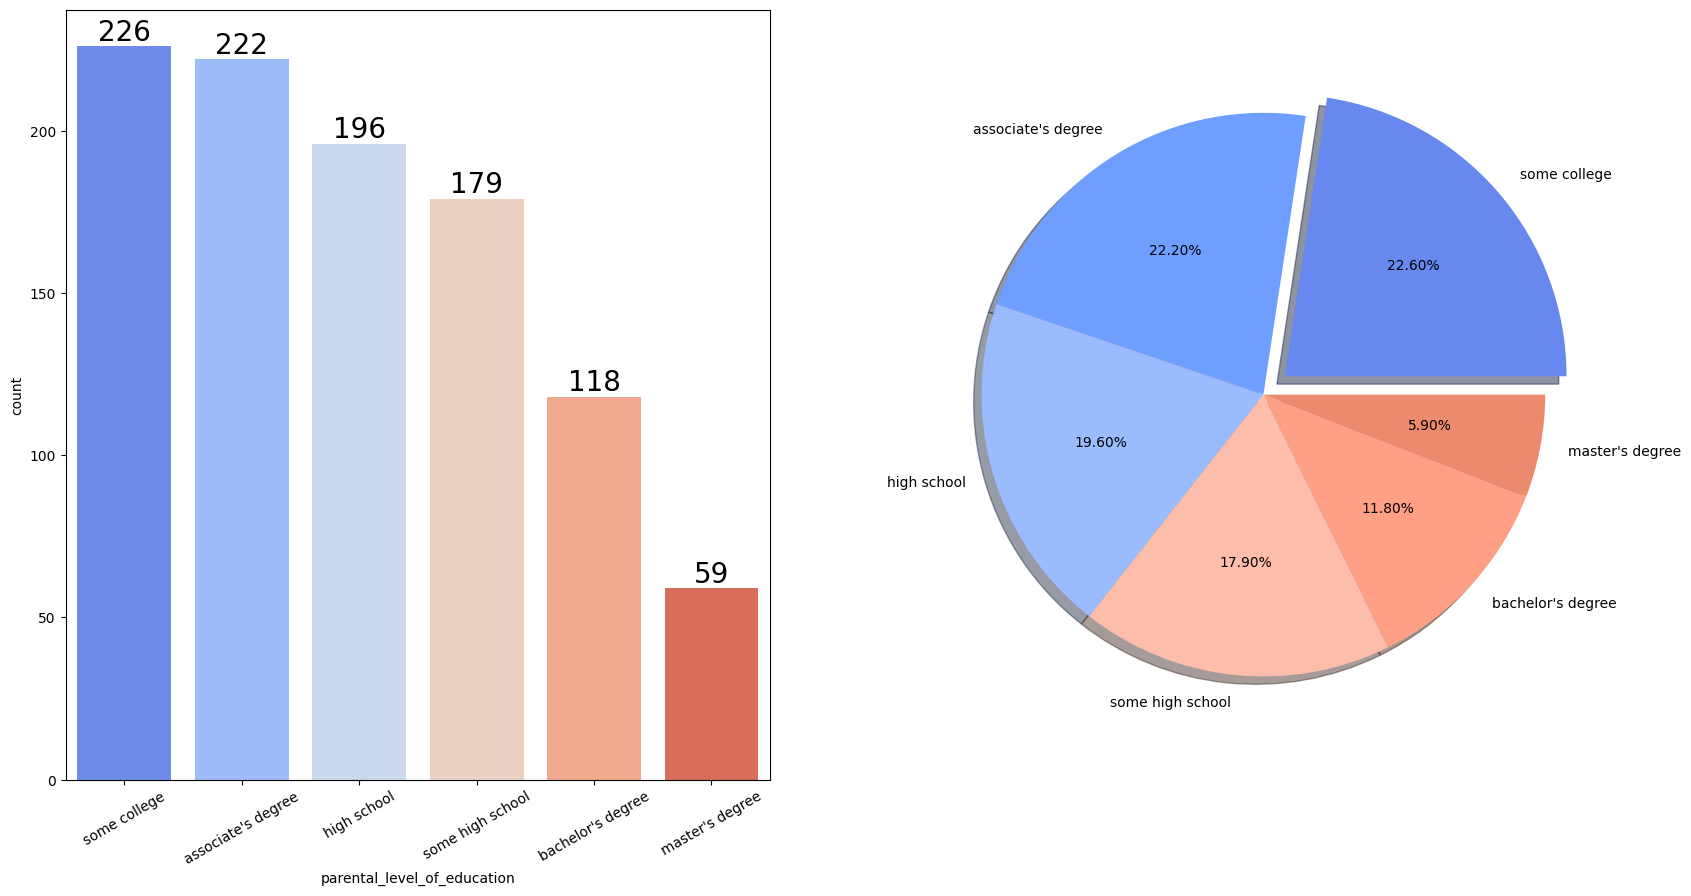

In [31]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# count plot
plot1 = sns.countplot(data=df, x=df['parental_level_of_education'], palette='coolwarm', ax=ax[0], saturation=0.90, order= df['parental_level_of_education'].value_counts().index)
plot1.set_xticklabels(labels = df['parental_level_of_education'].value_counts().index, rotation=30)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# pie plot
ax[1]
size = df['parental_level_of_education'].value_counts()
labels = df['parental_level_of_education'].value_counts().index
colors = ['#6788ee', '#6E9EFF', '#9ABBFE', '#FDBDAB', '#FFA085', '#ED8A6E']
plt.pie(x=size, labels=labels, autopct='%0.2f%%', colors = colors, explode=[0.1,0,0,0,0,0], shadow=True)
plt.show()

Observations:
- Most students parents have education of some college/associate's degree.

Bivariate Analysis (Does parent's education has an impact on student's performance?)

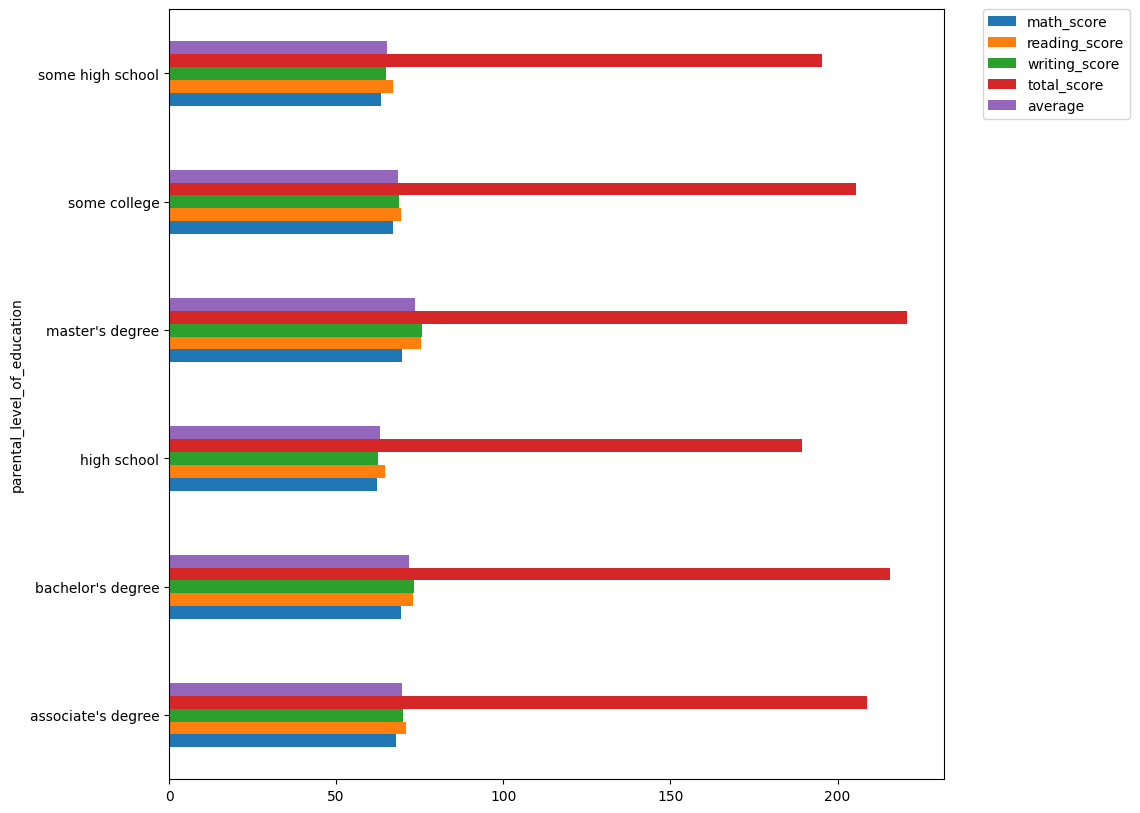

In [46]:
df.groupby('parental_level_of_education').agg('mean', numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Observations:
- The students whose parents have master's degree or bachelor's degree have higher scores

4.4.4 Lunch column

Univariate Analysis (what is the lunch distribution?)

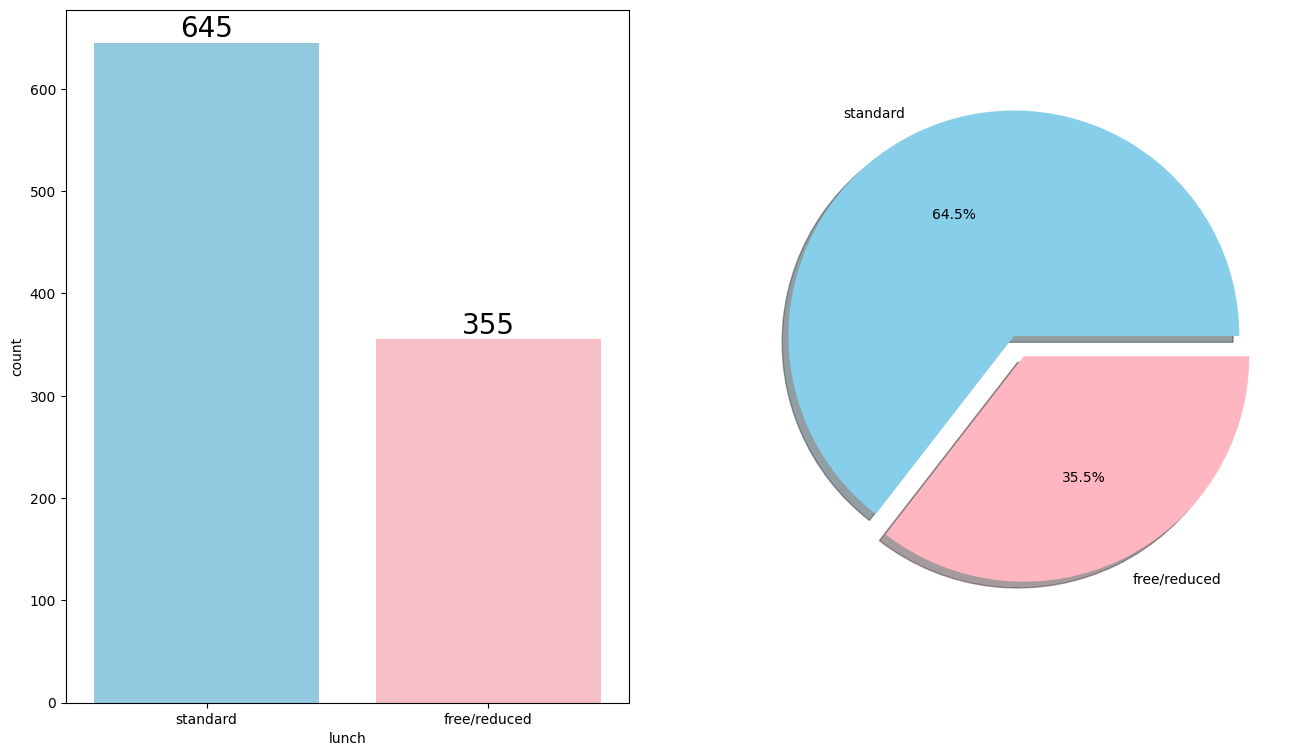

In [33]:
f, ax = plt.subplots(1, 2, figsize=(16,9))

# count plot
sns.countplot(data=df, x=df['lunch'], palette=['skyblue', 'lightpink'], ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# pie plot
ax[1]
size = df['lunch'].value_counts()
labels = df['lunch'].value_counts().index
colors = ['skyblue', 'lightpink']
plt.pie(x=size, labels=labels, colors=colors, autopct='%0.1f%%', explode = [0.1, 0], shadow = True)
plt.show()

Observations:
- Standard lunch is consumed more by students than free lunch

Bivariate Analysis (Does lunch has an impact on students performance?)

In [34]:
lunch_grouped = df.groupby('lunch').mean(numeric_only=True)
lunch_grouped

,math_score,reading_score,writing_score,total_score,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


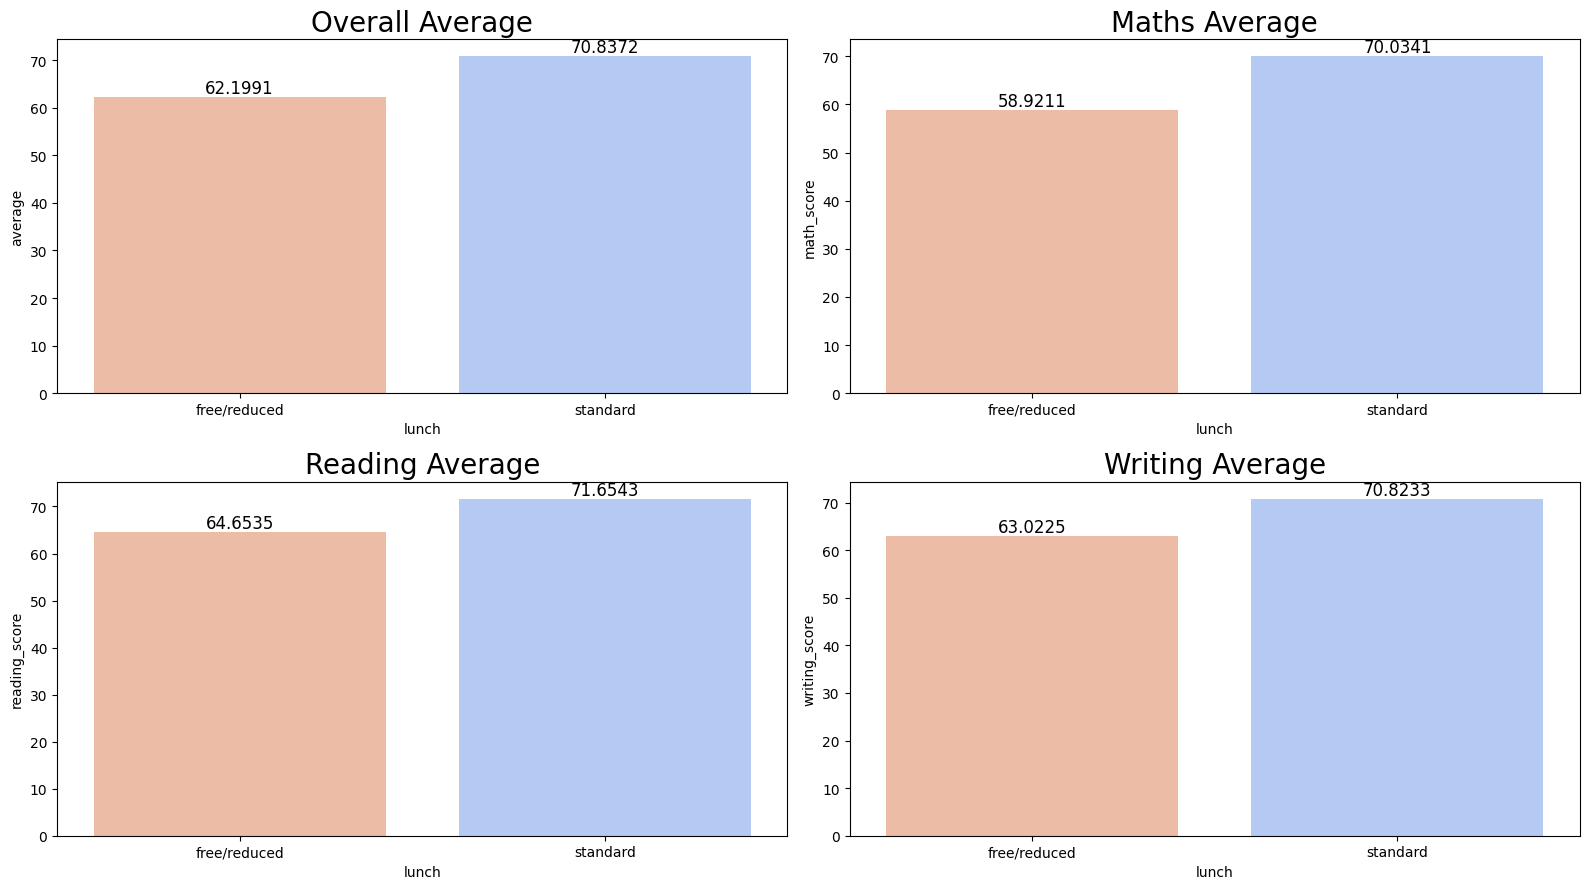

In [35]:
f, ax = plt.subplots(2, 2, figsize=(16, 9))

# overall average
sns.barplot(x=lunch_grouped.index, y=lunch_grouped['average'], palette='coolwarm_r', ax=ax[0][0])
ax[0][0].set_title('Overall Average', size=20)
for container in ax[0][0].containers:
    ax[0][0].bar_label(container, color='black', size=12)

# maths average
sns.barplot(x=lunch_grouped.index, y=lunch_grouped['math_score'], palette='coolwarm_r', ax=ax[0][1])
ax[0][1].set_title('Maths Average', size=20)
for container in ax[0][1].containers:
    ax[0][1].bar_label(container, color='black', size=12)

# reading average
sns.barplot(x=lunch_grouped.index, y=lunch_grouped['reading_score'], palette='coolwarm_r', ax=ax[1][0])
ax[1][0].set_title('Reading Average', size=20)
for container in ax[1][0].containers:
    ax[1][0].bar_label(container, color='black', size=12)

# writing average
sns.barplot(x=lunch_grouped.index, y=lunch_grouped['writing_score'], palette='coolwarm_r', ax=ax[1][1])
ax[1][1].set_title('Writing Average', size=20)
for container in ax[1][1].containers:
    ax[1][1].bar_label(container, color='black', size=12)

plt.tight_layout()
plt.show()

Observations:
- Students consuming standard lunch have performed well in the exams than students consuming free/reduced lunch

4.4.5 Test preparation course column

Univariate Analysis (How many students took the test preparation course?)

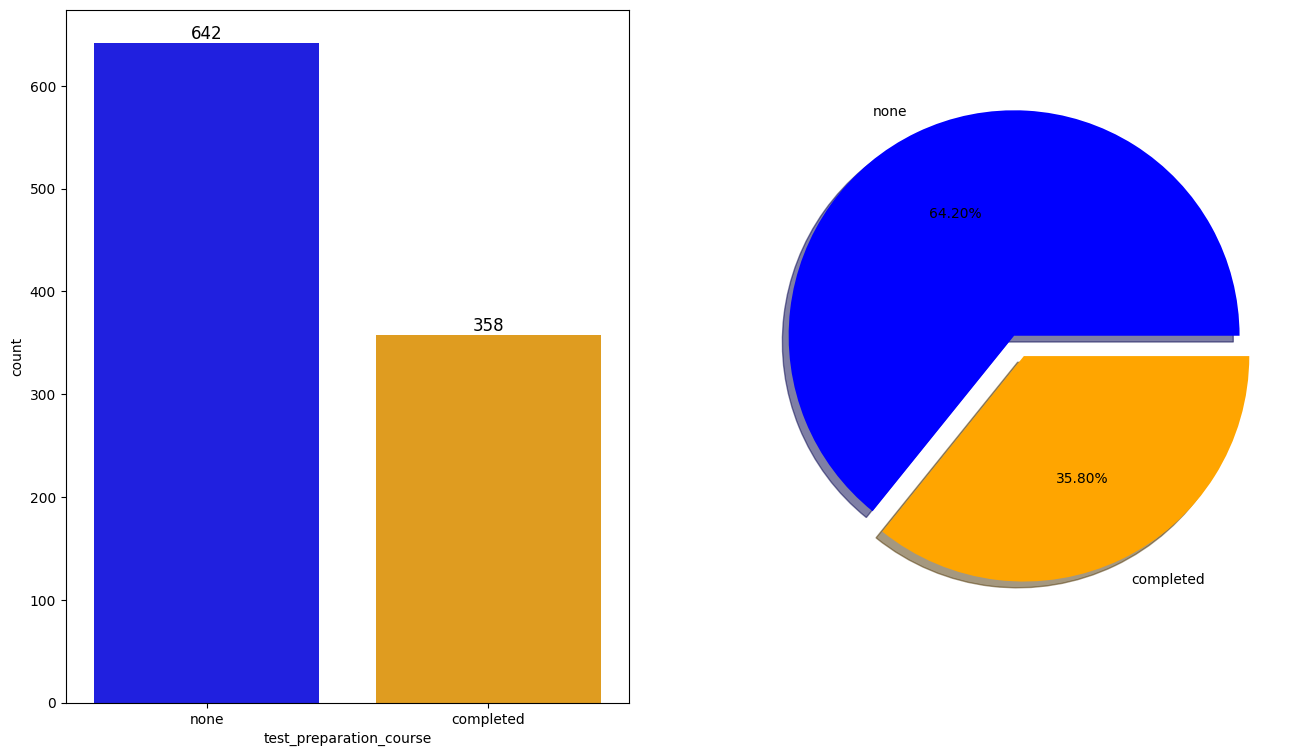

In [44]:
f, ax = plt.subplots(1,2, figsize=(16,9))

# count plot
sns.countplot(data=df, x=df['test_preparation_course'], palette=['blue', 'orange'], ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# pie plot
size=df['test_preparation_course'].value_counts()
labels=df['test_preparation_course'].value_counts().index
colors=['blue', 'orange']
plt.pie(x=size, labels=labels, colors=colors, autopct='%0.2f%%', explode=[0.1, 0], shadow=True)

plt.show()

Bivariate Analysis (What is the impact of test preparation course on the students performance?)

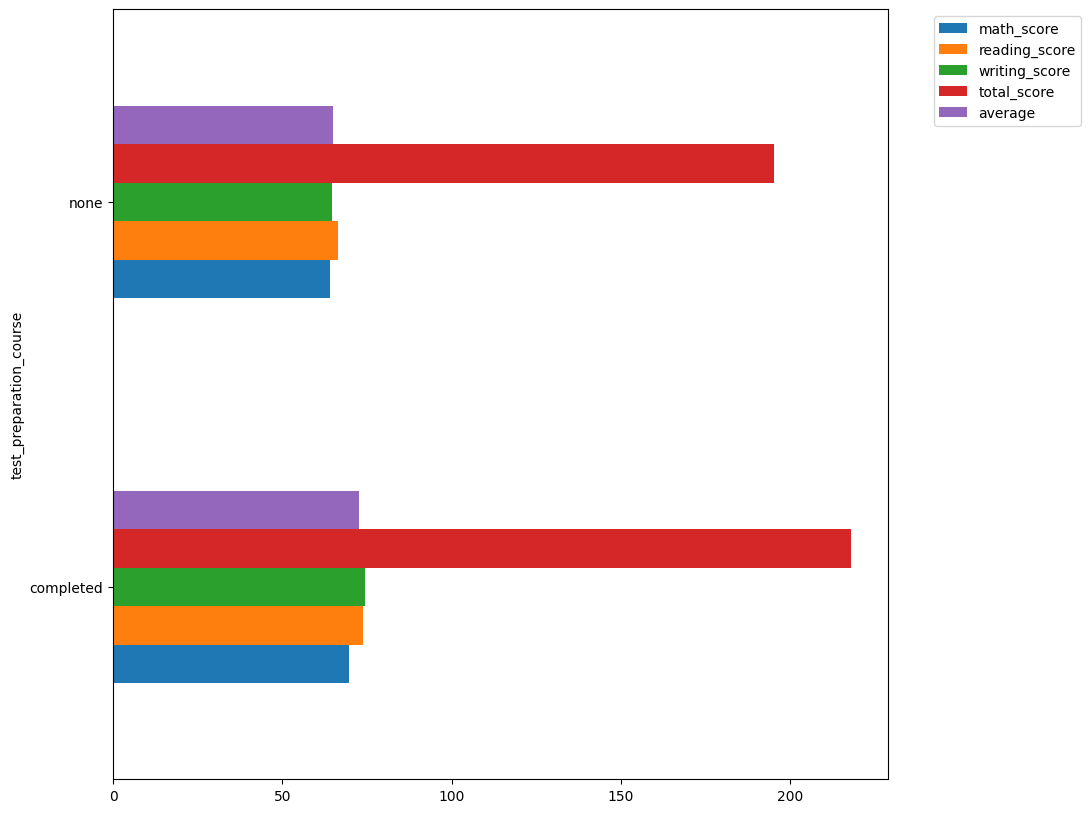

In [52]:
df.groupby('test_preparation_course').agg('mean', numeric_only=True).plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [53]:
test_grp = df.groupby('test_preparation_course').mean(numeric_only=True)
test_grp

,math_score,reading_score,writing_score,total_score,average
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


Observations:
- Students who have completed the test preparation course have performed well in all the exams

4.4.6 Check Outliers

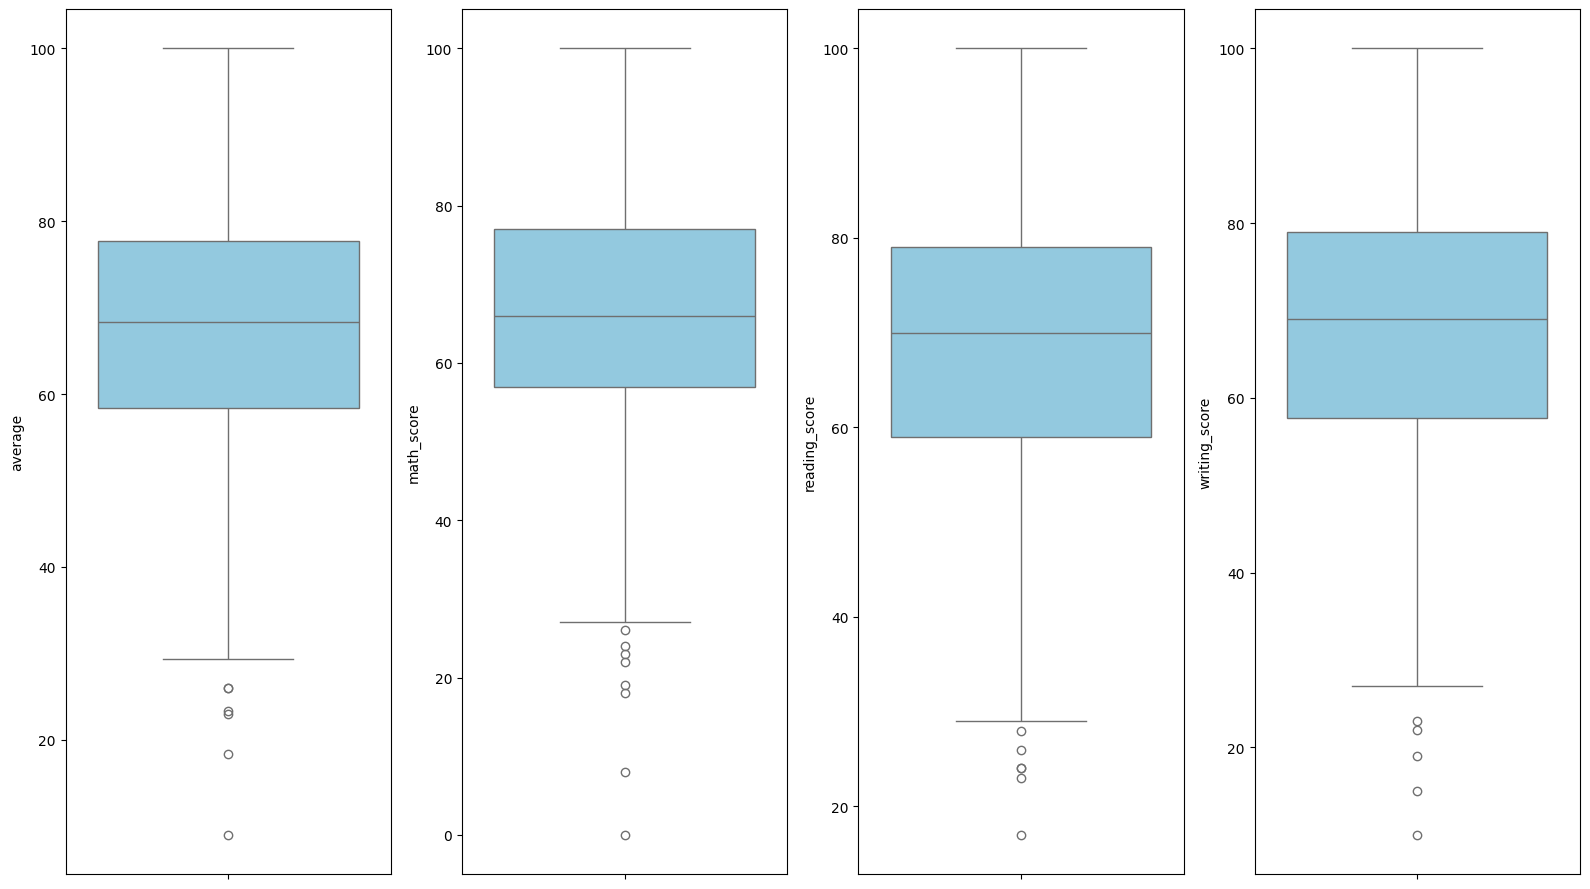

In [70]:
plt.subplots(1,4, figsize=(16, 9))

plt.subplot(141)
sns.boxplot(data=df, y=df['average'], color='skyblue')

plt.subplot(142)
sns.boxplot(data=df, y=df['math_score'], color='skyblue')

plt.subplot(143)
sns.boxplot(data=df, y=df['reading_score'], color='skyblue')

plt.subplot(144)
sns.boxplot(data=df, y=df['writing_score'], color='skyblue')

plt.tight_layout()
plt.show()

4.4.7 Multivariate Analysis using pairplot

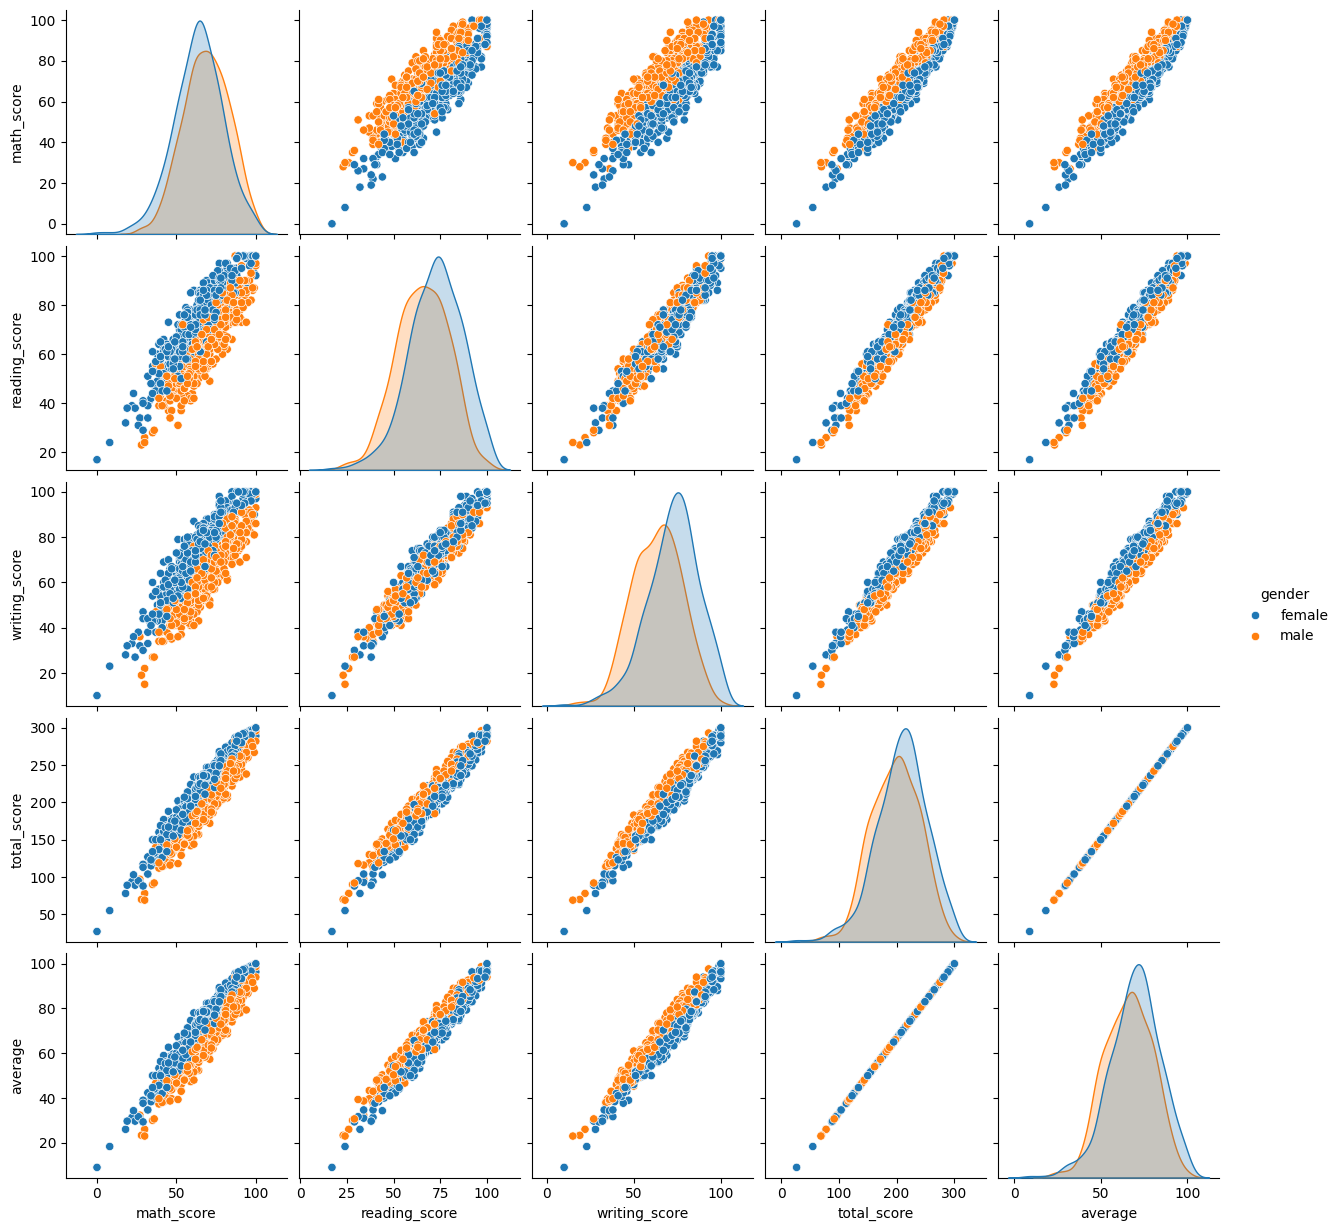

In [72]:
sns.pairplot(df, hue='gender')

plt.show()

Observations:
- All scores increase linearly with each other

### 5. Conclusion
- Students performance is related to gender, race_ethnicity, lunch, parental level of education, test preparation course